In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# create a pie chart for website
# Direct: 50
# Social Media: 30
# Refeeral: 15
# Other: 5
# Highlight Direct Traffic by exploding it.

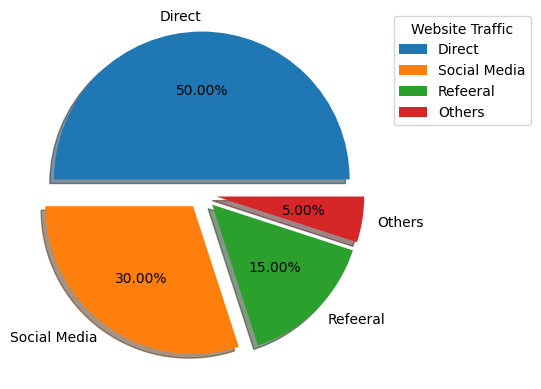

In [51]:
Website=('Direct','Social Media','Refeeral','Others')
Traffic=(50,30,15,5)
myexplode=[0.1,0.1,0.1,0.1]
plt.pie(Traffic,labels=Website,explode=myexplode,shadow=True,autopct='%1.2f%%')
plt.legend(title="Website Traffic",loc='upper left',bbox_to_anchor=(1,1))
plt.show()


In [ ]:
# Show expenditure breakdown:
# Rent:50
# food:20
# Transport:15
# Entertainment:10
# Other:5

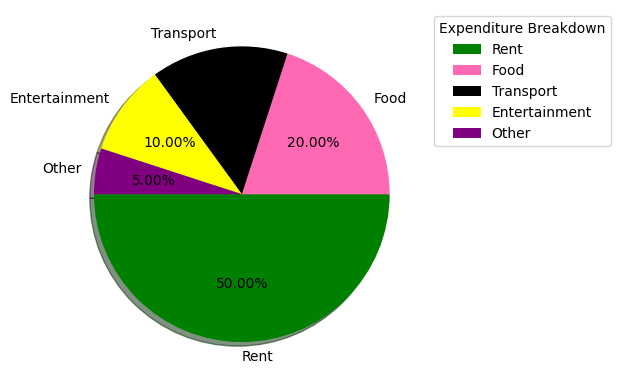

In [36]:
Expenditure=('Rent','Food','Transport','Entertainment','Other')
Breakdown=(50,20,15,10,5)
color=('Green','hotpink','black','yellow','purple')
plt.pie(Breakdown,labels=Expenditure,colors=color,startangle=180,shadow=True,autopct='%1.2f%%')
plt.legend(title='Expenditure Breakdown',loc='upper left',bbox_to_anchor=(1,1))
plt.show()

In [37]:
# Create a pie chart for social media users:
# Fasebook: 40
# Instagram: 30
# Twitter: 20
# LinkedIn: 10
# Highlight Instagram slice. Add shadow. Show legend outside.

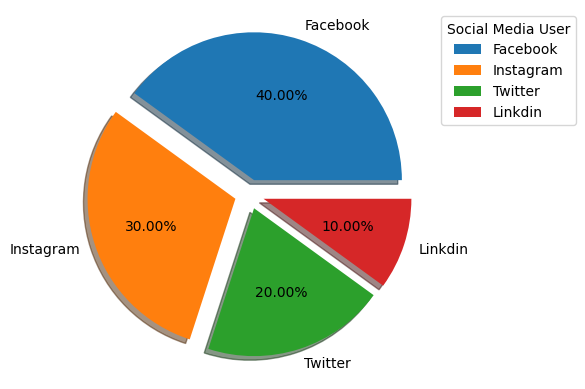

In [2]:
Social_Media=('Facebook','Instagram','Twitter','Linkdin')
User=(40,30,20,10)
explode=(0.1,0.1,0.1,0.1)
plt.pie(User,labels=Social_Media,explode=explode,shadow=True,autopct='%1.2f%%')
plt.legend(title='Social Media User',loc='upper left',bbox_to_anchor=(1,1))
plt.show()

In [3]:
df=pd.read_csv("Zomato_Data.csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Q.1. What type of restaurant do the majority of cutsomers order from ?

In [16]:
Order=df['listed_in(type)'].value_counts()
Order

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

C:\Users\HARSHIT CHAUHAN\AppData\Local\Temp\ipykernel_21300\830896701.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


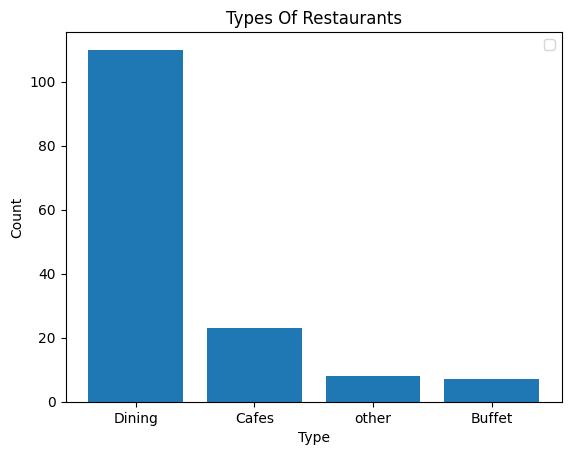

In [22]:
plt.bar(Order.index,Order.values)
plt.title('Types Of Restaurants')
plt.legend()
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Q.2. How many votes has each type of restaurant received from customers ?

In [31]:
x=df.groupby('listed_in(type)')['votes'].sum()
x

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

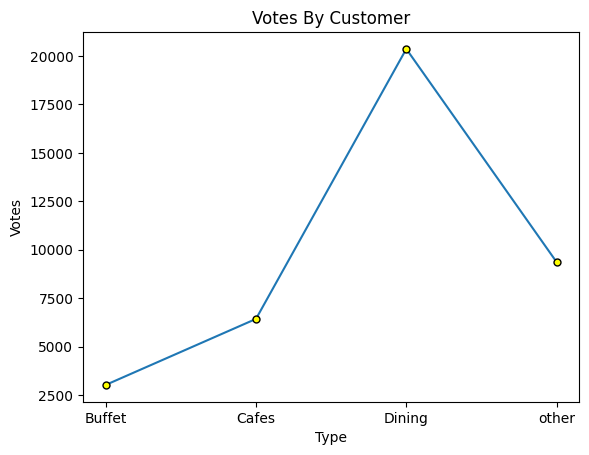

In [33]:
plt.plot(x,marker='o',mfc='yellow',mec='black',ms='5')
plt.title('Votes By Customer')
plt.xlabel('Type')
plt.ylabel('Votes')
plt.show()


# Q.3. What are the ratings that the majority of restaurants have received ?

Average Rating:3.6331081081081082


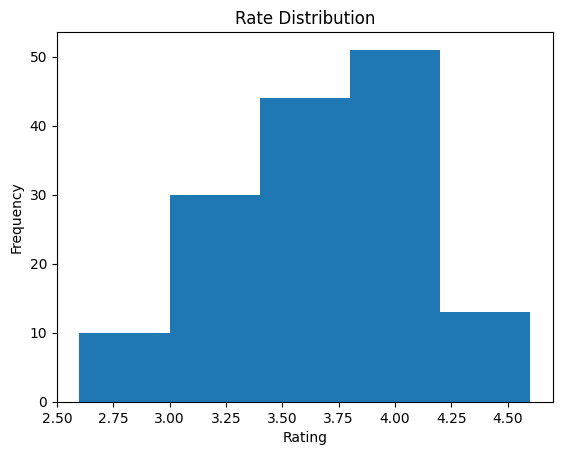

In [69]:
df['rate']=df['rate'].astype(str).str.replace('/5','').astype(float)
avg_rate=df['rate'].mean()
print(f'Average Rating:{avg_rate}')
plt.hist(df['rate'],bins=5)
plt.title('Rate Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Q.4. Zomato has observed that most couples order most of their food online.what is their average spending on each order

In [12]:
Average=df['approx_cost(for two people)'].mean()
Average

np.float64(418.2432432432432)

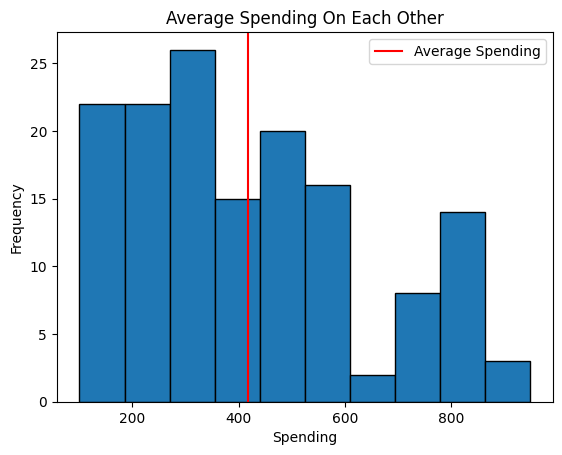

In [19]:
plt.hist(df['approx_cost(for two people)'],bins=10,edgecolor='black')
plt.axvline(Average,color='red',label='Average Spending')
plt.title('Average Spending On Each Other')
plt.xlabel('Spending')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Q.5. Which Mode (Online or offline) has received the maximum rating ?

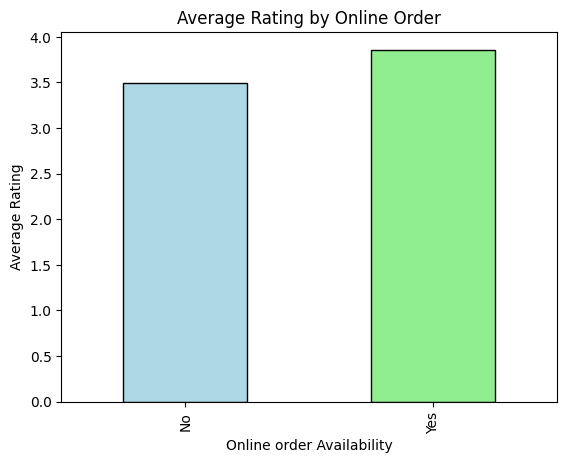

In [83]:
df['rate']=pd.to_numeric(df['rate'],errors='coerce')
avg_rating_online_order=df.groupby('online_order')['rate'].mean()
avg_rating_online_order.plot(kind='bar',color=['lightblue','lightgreen'],edgecolor='black')
plt.title('Average Rating by Online Order')
plt.xlabel('Online order Availability')
plt.ylabel('Average Rating')
plt.show()


# Q.6. Which type of restaurant received more order,so that zomato can provide those customers with some good offers? 

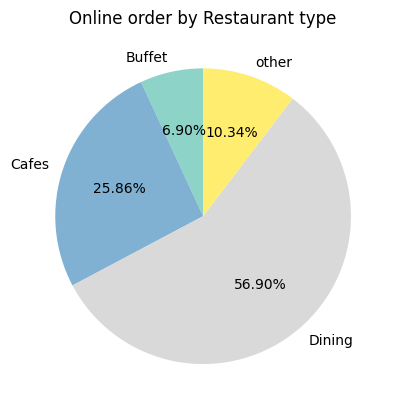

In [84]:
order_counts=df[df['online_order']=='Yes'].groupby('listed_in(type)').size()
order_counts.plot(kind='pie',autopct='%1.2f%%',startangle=90,cmap='Set3')
plt.title('Online order by Restaurant type')
plt.show()

In [73]:
order_counts=df[df['online_order']=='Yes'].groupby('listed_in(type)').size()
order_counts

listed_in(type)
Buffet     4
Cafes     15
Dining    33
other      6
dtype: int64